# SIT742: Modern Data Science 
**(2021 Assessment Task 01 - Data Manipulation)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension (up to 3 days) no later than *12:00pm on 16/04/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name: Yash Ahuja
- Student ID: 219608443
- Email: ahujaya@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---

# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [41]:
#loading data into a dataframe from zipped file of all txt files
import zipfile 
import os
import glob

with zipfile.ZipFile('HTWebLog_p1.zip','r') as myzip:
    myzip.extractall()
    
dir_name = os.getcwd()    
df_list = []        
file_counts = 0

for file in glob.glob(os.path.join(dir_name, '*.log')):
    df = pd.read_csv(file, sep = " ", skiprows=4, header=None, encoding='iso-8859-1', error_bad_lines = False, escapechar='\\') 
    df_list.append(df)
    file_counts+=1

df_ht = pd.concat(df_list, ignore_index=True)
print("No of files loaded: "+str(file_counts))

b'Skipping line 9892: expected 15 fields, saw 17\n'
b'Skipping line 79238: expected 15 fields, saw 17\n'
b'Skipping line 52695: expected 15 fields, saw 17\n'
b'Skipping line 89280: expected 15 fields, saw 17\n'
b'Skipping line 76427: expected 15 fields, saw 17\n'
b'Skipping line 41001: expected 15 fields, saw 17\nSkipping line 41238: expected 15 fields, saw 17\n'
b'Skipping line 113318: expected 15 fields, saw 17\n'
b'Skipping line 51450: expected 15 fields, saw 17\n'
b'Skipping line 45046: expected 15 fields, saw 17\n'
b'Skipping line 24408: expected 15 fields, saw 17\n'
b'Skipping line 56450: expected 15 fields, saw 17\n'


No of files loaded: 120


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [42]:
# printing top 5 rows
df_ht.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In [43]:
# adding column names
df_ht.columns = ['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username','c-ip', \
                 'cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In [44]:
#checking dimensions (rows, columns) of dataframe
df_ht.shape

(8438964, 15)

In [45]:
#concise summary of dataframe including index dtype and column dtypes, non-null values and memory usage.
# note: here non-null values are not shown as there are lot of null values in the dataset.
df_ht.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438964 entries, 0 to 8438963
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   time             object 
 2   s-sitename       object 
 3   s-ip             object 
 4   cs-method        object 
 5   cs-uri-stem      object 
 6   cs-uri-query     object 
 7   s-port           object 
 8   cs-username      object 
 9   c-ip             object 
 10  cs(User-Agent)   object 
 11  cs(Referer)      object 
 12  sc-status        float64
 13  sc-substatus     float64
 14  sc-win32-status  float64
dtypes: float64(3), object(12)
memory usage: 965.8+ MB


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [46]:
# No of unique values in each column
df_ht.nunique()

date                 124
time               86385
s-sitename            14
s-ip                   2
cs-method              7
cs-uri-stem         4762
cs-uri-query        1988
s-port                 3
cs-username            2
c-ip               74549
cs(User-Agent)      4961
cs(Referer)        39718
sc-status             13
sc-substatus           4
sc-win32-status       14
dtype: int64

1. Checking which columns have NAs

In [47]:
na_columns = df_ht.columns[df_ht.isna().any()].tolist()
na_columns

['s-sitename',
 's-ip',
 'cs-method',
 'cs-uri-stem',
 'cs-uri-query',
 's-port',
 'cs-username',
 'c-ip',
 'cs(User-Agent)',
 'cs(Referer)',
 'sc-status',
 'sc-substatus',
 'sc-win32-status']

In [48]:
#preliminary checking of null values for each of these columns
df_ht.isna().sum()[2:]

s-sitename         12
s-ip               24
cs-method          24
cs-uri-stem        24
cs-uri-query       36
s-port             36
cs-username        36
c-ip               36
cs(User-Agent)     36
cs(Referer)        36
sc-status          36
sc-substatus       39
sc-win32-status    80
dtype: int64

Lets find values corresponding to NAs for each of these above NA columns as NaN, -,None, etc. all are missing values. For this use value_counts() function to evaluate the no of value counts for each unique value of all these NA columns (except date and time) and then replace other values such as None, - with NaN

In [49]:
df_ht['s-sitename'].value_counts(dropna=False)

W3SVC1      8438928
Internet         12
NaN              12
20:26:44          1
15:27:52          1
22:47:17          1
10:43:56          1
14:59:02          1
19:09:59          1
04:19:47          1
19:10:23          1
23:01:48          1
19:11:29          1
23:00:00          1
12:18:13          1
Name: s-sitename, dtype: int64

In [50]:
df_ht['s-ip'].value_counts(dropna=False)

127.0.0.1      8438928
NaN                 24
Information         12
Name: s-ip, dtype: int64

In [51]:
df_ht['cs-method'].value_counts(dropna=False)

GET         8421984
POST           9509
HEAD           6723
OPTIONS         595
PROPFIND        106
NaN              24
Services         12
PUT              11
Name: cs-method, dtype: int64

In [52]:
df_ht['cs-uri-stem'].value_counts(dropna=False)

/Tulip/common/common_style.aspx                                        402987
/Tulip/includes/js/CommonUtil.js                                       127704
/Tulip/common/images/top_bar.jpg                                       125764
/Tulip/common/images/spacer.gif                                        105486
/Tulip/common/images/bar_1.gif                                         100641
                                                                        ...  
/promotion/FP05703_2.jpg                                                    1
/Nikko/common/zh-cn/images/popUp_head.jpg                                   1
/Tulip/dining/zh-hk/Tulip/dining/images/cafeSerena_ALaCarteMenu.pdf         1
/Tulip/aboutus/zh-cn/photo/Lobby01.jpg                                      1
/Tulip/aboutus/zh-cn/virtualTour/BU-1442-ZF5JEG-01/users.xml                1
Name: cs-uri-stem, Length: 4763, dtype: int64

In [53]:
df_ht['cs-uri-query'].value_counts(dropna=False)

-                        7886532
lang=en-us                231265
lang=zh-hk                191196
lang=ja                    51295
pageId=164&lang=zh-hk       8336
                          ...   
lang=zh-hk&refid=1914          1
lang=en-us&refid=2309          1
lang=ja&refid=2149             1
lang=zh-hk&refid=2306          1
lang=ja&refid=1963             1
Name: cs-uri-query, Length: 1989, dtype: int64

In [54]:
# replacing '-' with NaN
df_ht['cs-uri-query'].replace('-', np.nan, inplace=True)

In [55]:
# verifying
df_ht['cs-uri-query'].value_counts(dropna=False)

NaN                      7886568
lang=en-us                231265
lang=zh-hk                191196
lang=ja                    51295
pageId=164&lang=zh-hk       8336
                          ...   
lang=zh-hk&refid=1914          1
lang=en-us&refid=2309          1
lang=ja&refid=2149             1
lang=zh-hk&refid=2306          1
lang=zh-hk&refid=2884          1
Name: cs-uri-query, Length: 1988, dtype: int64

In [56]:
df_ht['s-port'].value_counts(dropna=False)

80.0    8377582
80        61342
NaN          36
-             4
Name: s-port, dtype: int64

In [57]:
# replacing '-' with NaN
df_ht['s-port'].replace('-', np.nan, inplace=True)

In [58]:
# verifying
df_ht['s-port'].value_counts(dropna=False)

80.0    8377582
80        61342
NaN          40
Name: s-port, dtype: int64

In [59]:
df_ht['c-ip'].value_counts(dropna=False)

59.188.33.66       93769
210.184.71.81      92460
202.181.238.254    29934
158.132.12.80      18743
211.72.233.8       16319
                   ...  
61.211.35.188          1
24.226.169.208         1
221.220.178.82         1
59.105.107.85          1
65.117.70.74           1
Name: c-ip, Length: 74550, dtype: int64

In [60]:
df_ht['cs(User-Agent)'].value_counts(dropna=False)

Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322)                                         1982248
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)                                                            1606612
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)                                                                  600946
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322;+.NET+CLR+2.0.50727)                      344081
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.0)                                                                  291188
                                                                                                                    ...   
OmniExplorer_Bot/6.8.1+(+http://www.omni-explorer.com)+WorldIndexer                                                      1
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+Alcohol+Search;+Alexa+Toolbar;+mxie;+.NET+CLR+1.1.4322)          1
DoCoMo/2.0+N901i

In [61]:
df_ht['cs(Referer)'].value_counts(dropna=False)

http://www.hotelTulip.com.hk/Tulip/home/en-us/home_index.aspx                                                                                                                                         1618649
-                                                                                                                                                                                                     1308993
http://www.hotelTulip.com.hk/Tulip/home/zh-hk/home_index.aspx                                                                                                                                          491233
http://www.hotelTulip.com.hk/Tulip/whatsnew/whatsnew_foodindex.aspx?lang=zh-hk                                                                                                                         377525
http://www.hotelTulip.com.hk/Tulip/dining/zh-hk/dining_cafeserena.aspx                                                                                                          

In [62]:
df_ht['sc-status'].value_counts(dropna=False)

200.0    6074352
304.0    2137486
404.0     143646
206.0      72493
302.0       7368
500.0       2020
403.0        703
301.0        436
400.0        210
501.0        113
406.0         54
0.0           44
NaN           36
416.0          3
Name: sc-status, dtype: int64

In [63]:
df_ht['sc-substatus'].value_counts(dropna=False)

0.0     8438220
14.0        676
NaN          39
1.0          27
2.0           2
Name: sc-substatus, dtype: int64

In [64]:
df_ht['sc-win32-status'].value_counts(dropna=False)

0.0       8056956
64.0       241836
2.0         98315
3.0         29312
1236.0       6442
121.0        2399
22.0         1678
123.0        1288
5.0           621
NaN            80
1231.0         19
1232.0         12
1229.0          3
1260.0          2
1234.0          1
Name: sc-win32-status, dtype: int64

In [65]:
df_ht['cs-username'].value_counts(dropna=False)

-               8438924
NaN                  36
210.3.33.150          4
Name: cs-username, dtype: int64

In [66]:
#replacing '-' with NaN
df_ht['cs-username'].replace('-', np.nan, inplace=True)

In [67]:
# verifying
df_ht['cs-username'].value_counts(dropna=False)

NaN             8438960
210.3.33.150          4
Name: cs-username, dtype: int64

2. For each of the NA columns, now display the actual number of NA records

In [68]:
for name in na_columns:
    print(name+' has number of NA records: '+str(df_ht[name].isna().sum()))

s-sitename has number of NA records: 12
s-ip has number of NA records: 24
cs-method has number of NA records: 24
cs-uri-stem has number of NA records: 24
cs-uri-query has number of NA records: 7886568
s-port has number of NA records: 40
cs-username has number of NA records: 8438960
c-ip has number of NA records: 36
cs(User-Agent) has number of NA records: 36
cs(Referer) has number of NA records: 36
sc-status has number of NA records: 36
sc-substatus has number of NA records: 39
sc-win32-status has number of NA records: 80


As we can see in the above output, all the NA columns except cs-username and cs-uri-query have less than 15% NA values. But for cs-username, cs-uri-query column, after replacing '-' with NaN, approx. all the values are NaN. Hence, removing these columns. 

In [69]:
df_ht.drop(['cs-username', 'cs-uri-query'], axis=1, inplace=True)

3. Remove all records with any NAs.

In [70]:
df_ht.dropna(axis=0, inplace=True, how='any')

In [71]:
# combining date and time columns
df_ht['Datetime'] = df_ht['date'] + ' ' + df_ht['time']

In [72]:
# changing dtype from object to datetime
df_ht['Datetime'] = pd.to_datetime(df_ht['Datetime'])

In [73]:
# verifying whehter dtype has changed
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438884 entries, 0 to 8438963
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             object        
 1   time             object        
 2   s-sitename       object        
 3   s-ip             object        
 4   cs-method        object        
 5   cs-uri-stem      object        
 6   s-port           object        
 7   c-ip             object        
 8   cs(User-Agent)   object        
 9   cs(Referer)      object        
 10  sc-status        float64       
 11  sc-substatus     float64       
 12  sc-win32-status  float64       
 13  Datetime         datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(10)
memory usage: 965.8+ MB


In [74]:
# now removing redundant date and time columns
df_ht.drop(['date', 'time'], axis=1, inplace=True)

In [75]:
# final dimensions (rows, columns) after data cleaning
df_ht.shape

(8438884, 12)

## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 

In [76]:
# extracting hour of the day from time
df_ht['hour'] = df_ht['Datetime'].dt.hour

In [77]:
# no of unique values of hour column should be [0..23]
df_ht.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

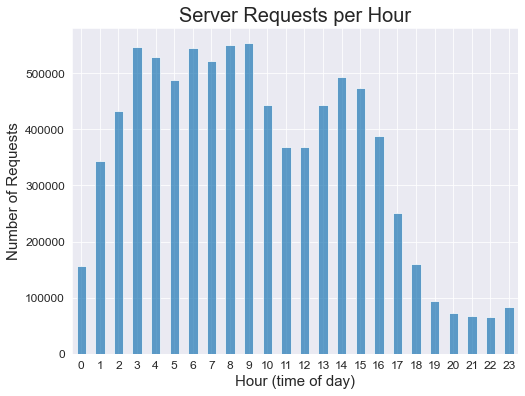

In [78]:
# Creating a bar chart of the number of server requests by hour of the day
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax = df_ht.groupby('hour').size().plot(kind='bar', figsize=[8,6], alpha=0.7)
ax.set_title('Server Requests per Hour', fontsize=20)
ax.set_xlabel('Hour (time of day)', fontsize=15)
ax.set_ylabel('Number of Requests', fontsize=15)
ax.set_xticklabels(ax.get_xticks(), rotation=360)
ax.tick_params(axis='both', labelsize='large')
plt.show()


<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [79]:
# setting the lower and upper bounds
lower_bound = 400000
upper_bound = 490000

In [80]:
# grouping the data
hourly_request_amount = df_ht.groupby('hour').size()
hourly_request_amount

hour
0     155981
1     344432
2     432315
3     546752
4     529464
5     487430
6     544818
7     522542
8     550926
9     553699
10    443621
11    369077
12    367890
13    442659
14    493981
15    473376
16    387553
17    250391
18    159596
19     93867
20     73070
21     66515
22     65247
23     83682
dtype: int64

In [81]:
#filtering the data
table = hourly_request_amount[(hourly_request_amount >= lower_bound) & (hourly_request_amount <= upper_bound)]
table = table.reset_index(name="Hourly Request Amount")

In [82]:
# final table
table

,hour,Hourly Request Amount
0,2,432315
1,5,487430
2,10,443621
3,13,442659
4,15,473376


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

#### Server Status

In [83]:
# Discovering on the server status using 'sc-status' from DataFrame
sorted_counts = df_ht['sc-status'].value_counts()
sorted_counts

200.0    6074352
304.0    2137486
404.0     143646
206.0      72493
302.0       7368
500.0       2020
403.0        703
301.0        436
400.0        210
501.0        113
406.0         54
416.0          3
Name: sc-status, dtype: int64

In [84]:
# types of server status reported
print("Types of server status reported "+str(len(sorted_counts)))

Types of server status reported: 12


In [85]:
sorted_counts.index

Float64Index([200.0, 304.0, 404.0, 206.0, 302.0, 500.0, 403.0, 301.0, 400.0,
              501.0, 406.0, 416.0],
             dtype='float64')

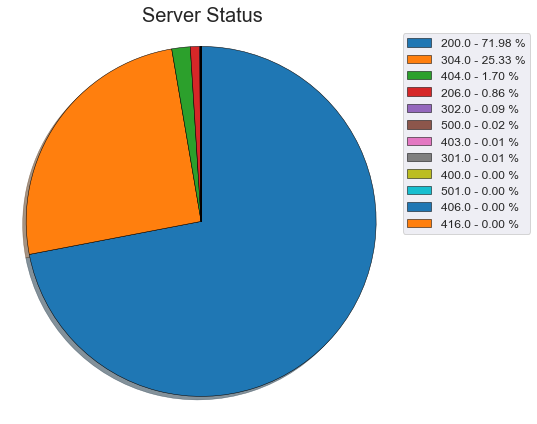

In [86]:
# setting figure size
plt.figure(figsize=[8,6])
# setting pie chart properties
wp={'linewidth':0.5, 'edgecolor':'black'}
tp={'fontsize': 14}
#plotting pie chart
patches, texts = plt.pie(sorted_counts,startangle=90, counterclock=False, wedgeprops=wp, textprops = tp, shadow=True)
#setting legend
status_types=sorted_counts.index
percent = 100*sorted_counts/sorted_counts.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(status_types, percent)]
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
#setting titles and labels
plt.title('Server Status', fontsize=20)
#setting square plot where the ranges for both axes occupied are equal to the length in plot i.e. xmax-xmin == ymax-ymin
plt.axis('square')
# to prevent overlapping to some extent
plt.tight_layout();

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [87]:
!pip install ip2geotools

In [88]:
from ip2geotools.databases.noncommercial import DbIpCity

In [89]:
filtered_requests = df_ht.loc[(df_ht['Datetime'] >= '2007-01-01 20:00:00') & (df_ht['Datetime'] <= '2007-01-01 20:59:59')]
filtered_requests

,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,Datetime,hour
4770460,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0,2007-01-01 20:00:00,20
4770461,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,2007-01-01 20:00:00,20
4770462,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/HarbourViewRoom02.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,-,200.0,0.0,0.0,2007-01-01 20:01:12,20
4770463,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SkyLounge01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,-,200.0,0.0,0.0,2007-01-01 20:01:48,20
4770464,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SuperiorRoom01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,-,200.0,0.0,0.0,2007-01-01 20:01:57,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770669,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.85.161,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,-,404.0,0.0,2.0,2007-01-01 20:52:46,20
4770670,W3SVC1,127.0.0.1,GET,/Tulip/dining/zh-hk/dining_cafeserena.aspx,80,74.6.85.206,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,-,200.0,0.0,0.0,2007-01-01 20:52:48,20
4770671,W3SVC1,127.0.0.1,GET,/Tulip/whatsnew/whatsnew_roomsdetail.aspx,80,202.160.178.181,Mozilla/5.0+(compatible;+Yahoo!+Slurp+China;+h...,-,200.0,0.0,0.0,2007-01-01 20:59:04,20
4770672,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.75.47,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,-,404.0,0.0,2.0,2007-01-01 20:59:40,20


In [90]:
print("The number of requests received in the period: " + str(filtered_requests.shape[0]))

The number of requests received in the period: 214


In [91]:
filtered_requests['Country'] = filtered_requests.apply(lambda row: DbIpCity.get(row['c-ip'],api_key='free').country, axis=1)

In [92]:
print("The number of countries involved in the period: " + str(filtered_requests.Country.nunique()))

The number of countries involved in the period: 5


In [93]:
# Number of requests by country
country_requests = filtered_requests['Country'].value_counts()
country_requests

HK    169
CN     25
US     16
IT      3
AU      1
Name: Country, dtype: int64

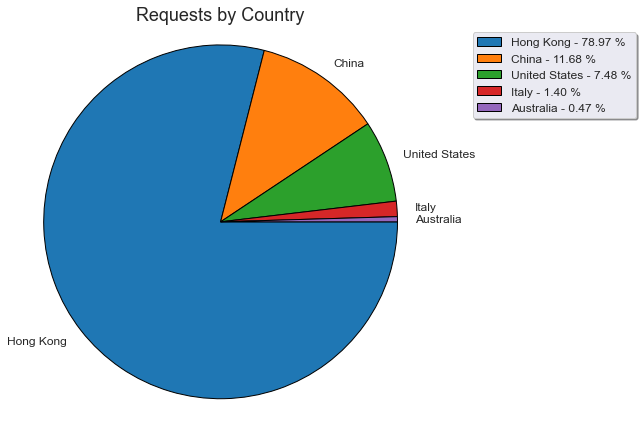

In [94]:
# Create a pie chart of the country values
plt.figure(figsize=[8,6])
# setting pie chart properties
country_labels = ['Hong Kong', 'China', 'United States', 'Italy', 'Australia']
wp={'linewidth':1.0, 'edgecolor':'black'}
tp={'fontsize': 12}  
#plotting the graph
patches, texts = plt.pie(country_requests, labels=country_labels, wedgeprops=wp, textprops=tp, startangle=360, \
                         counterclock=False)
#setting legend
percent = 100*country_requests/country_requests.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(country_labels, percent)]
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(1.13,1), 
          frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':12})
#setting title and axis
plt.title('Requests by Country', fontsize=18)
plt.axis('square')
plt.tight_layout()
plt.show()

In [95]:
#top 3 countries with request numbers
country_requests[:3]

HK    169
CN     25
US     16
Name: Country, dtype: int64

#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

In [96]:
filtered_requests['City'] = filtered_requests.apply(lambda row: DbIpCity.get(row['c-ip'],api_key='free').city, axis=1)

In [97]:
print("The number of cities involved in the period: " + str(filtered_requests.City.nunique()))

The number of cities involved in the period: 11


In [98]:
#Their names
for name in filtered_requests.City.unique():
    print(name)

Hong Kong
Valcanneto
Jinrongjie (Xicheng District)
Quarry Bay
Beijing
San Francisco (Financial District)
Sydney
New York
Hangzhou
Mountain View
Ha Kwai Chung


In [99]:
# Number of requests by city
city_requests = filtered_requests['City'].value_counts()
city_requests

Ha Kwai Chung                         166
Beijing                                15
New York                               14
Jinrongjie (Xicheng District)           9
Valcanneto                              3
Hong Kong                               2
San Francisco (Financial District)      1
Quarry Bay                              1
Sydney                                  1
Mountain View                           1
Hangzhou                                1
Name: City, dtype: int64

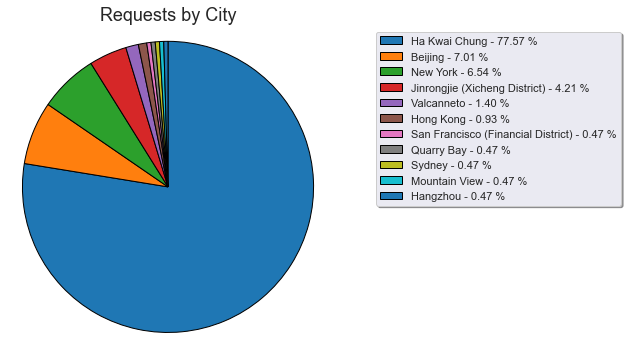

In [100]:
# Create a pie chart of the country values
plt.figure(figsize=[8,6])
# setting pie chart properties
wp={'linewidth':1.0, 'edgecolor':'black'}
tp={'fontsize': 12}  
city_labels = city_requests.index
#plotting the graph
patches, texts = plt.pie(city_requests, wedgeprops=wp, textprops=tp, startangle=90, counterclock=False)
#setting legend
percent = 100*city_requests/city_requests.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(city_labels, percent)]
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(1.13,1), 
          frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':11})
#setting title and axis
plt.title('Requests by City', fontsize=18)
plt.axis('square')
plt.tight_layout()
plt.show()

In [101]:
#top 3 cities with request numbers
city_requests[:3]

Ha Kwai Chung    166
Beijing           15
New York          14
Name: City, dtype: int64

# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [102]:
# write your import and necessary web crawling libary here

In [103]:
import requests
from bs4 import BeautifulSoup

In [104]:
url = 'https://www.deakin.edu.au/information-technology/staff-listing'
response = requests.get(url)

In [105]:
soup = BeautifulSoup(response.content, 'lxml')

In [106]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="no-js ie9 oldie" lang="en"> <![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta content="11409809948" property="fb:pages"/>
  <meta content="IE=9; IE=8; IE=EDGE" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <title>
   Staff listing - School of Information Technology | Deakin
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="a_cwnT_BD1guc9eJXsrYEu4F9iXfn4Qesf_SNyv-KJY" name="google-site-verification"/>
  <meta content="" name="dmp-marketo-unique-code"/>
  <!-- Open graph metadata -->
  <meta content="https://www.deakin.edu.au/information-technology/staff-listing" property="og:url"/>
  <meta content="Staff listing - School of Information Technology" property="og:title"/>
  <meta content="website" property="og:type"/>
  <meta content="Find out more about the Sc

As identified from the prettify() function ouput, it is evident that the professor details are stored in table tag. Therefore, we need to extract all contents within the 'table' tag or in other terms extract all the tables.  

### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [107]:
# Extracting all contents within the 'table' tag or in other terms extracting all the tables
all_tables = soup.find_all('table')
print(all_tables)

[<table id="table09355"><thead><tr><th id="table09355r1c1"> Name</th></tr></thead><tbody><tr><td headers="table09355r1c1"><a href="https://www.deakin.edu.au/about-deakin/people/lynn-batten" target="_blank">Emeritus Professor Lynn Batten</a></td></tr><tr><td headers="table09355r1c1"><a href="https://www.deakin.edu.au/about-deakin/people/andrzej-goscinski">Emeritus Professor Andrzej Goscinski</a></td></tr></tbody></table>, <table id="table09355"><thead><tr><th id="table09355r1c1"> Name</th></tr></thead><tbody><tr><td headers="table09355r1c1"><a href="https://www.deakin.edu.au/about-deakin/people/jemal-abawajy">Professor Jemal Abawajy</a></td></tr><tr><td headers="table09355r1c1"><a href="https://www.deakin.edu.au/about-deakin/people/maia-angelova-turkedjieva">Professor Maia Angelova</a></td></tr><tr><td headers="table09355r1c1"><a href="https://www.deakin.edu.au/about-deakin/people/gleb-beliakov">Professor Gleb Beliakov</a></td></tr><tr><td headers="table09355r1c1"><a href="https://www.d

In [108]:
# extracting url information for identifying the university name
url_list = []
for table in all_tables:
    for row in table.findAll("tr"):
        cells = row.findAll("td")
        if len(cells)>0:
            url_list.append(cells[0].find('a').get('href'))
url_list

['https://www.deakin.edu.au/about-deakin/people/lynn-batten',
 'https://www.deakin.edu.au/about-deakin/people/andrzej-goscinski',
 'https://www.deakin.edu.au/about-deakin/people/jemal-abawajy',
 'https://www.deakin.edu.au/about-deakin/people/maia-angelova-turkedjieva',
 'https://www.deakin.edu.au/about-deakin/people/gleb-beliakov',
 'https://www.deakin.edu.au/about-deakin/people/terry-caelli',
 'https://www.deakin.edu.au/about-deakin/people/jinho-choi',
 '//www.deakin.edu.au/about-deakin/people/chang-tsun-li',
 'https://www.deakin.edu.au/about-deakin/people/robin-ram-mohan-doss',
 'https://www.deakin.edu.au/about-deakin/people/peter-eklund',
 'https://www.deakin.edu.au/about-deakin/people/seng-loke',
 'https://www.deakin.edu.au/about-deakin/people/antonio-robles-kelly',
 'https://www.deakin.edu.au/about-deakin/people/jean-guy-schneider',
 'https://www.deakin.edu.au/about-deakin/people/yong-xiang',
 'https://www.deakin.edu.au/about-deakin/people/john-yearwood',
 'https://www.deakin.edu.

In [109]:
# creating a list for the university names
university_list = []
for i in range(len(url_list)):
    university_list.append(url_list[i].split('/')[2].split('.')[1].capitalize()+" University")
    
university_list

['Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin University',
 'Deakin U

In [110]:
# extracting title and name information
title_name_list = []
for table in all_tables:
    for row in table.findAll("tr"):
        cells = row.findAll("td")
        if len(cells)>0:
            title_name_list.append(cells[0].find(text=True)) 

title_name_list

['Emeritus Professor Lynn Batten',
 'Emeritus Professor Andrzej Goscinski',
 'Professor Jemal Abawajy',
 'Professor Maia Angelova',
 'Professor Gleb Beliakov',
 'Professor Terry Caelli',
 'Professor Jinho Choi',
 'Professor Chang-Tsun Li',
 'Professor Robin Doss',
 'Professor Peter Eklund',
 'Professor Seng Loke',
 'Professor Antonio Robles-Kelly',
 'Professor Jean-Guy Schneider',
 'Professor Yong Xiang',
 'Professor John Yearwood',
 'Professor Arkady Zaslavsky',
 'Associate Professor Mohamed Abdelrazek',
 'Associate Professor Andrew Cain',
 'Associate Professor Richard Dazeley',
 'Associate Professor Guangyan Huang',
 'Associate Professor Gang Li',
 'Associate Professor Jianxin Li',
 'Associate Professor Xiao Liu',
 'Associate Professor Vicky Mak',
 'Associate Professor Tim Wilkin',
 'Dr Chetan Arora',
 'Dr Zubair Baig',
 'Dr Shaun Bangay',
 'Dr Muneera Bano',
 'Dr Jan Carlo Barca',
 'Dr Morshed Chowdhury',
 'Dr Niroshinie Fernando',
 'Dr Longxiang Gao',
 'Dr Shang Gao',
 'Dr Marek Ga

In [111]:
# creating a list just for names
name_list = []
for i in range(len(title_name_list)):
    name_list.append(title_name_list[i].split()[-2:])

name_list

[['Lynn', 'Batten'],
 ['Andrzej', 'Goscinski'],
 ['Jemal', 'Abawajy'],
 ['Maia', 'Angelova'],
 ['Gleb', 'Beliakov'],
 ['Terry', 'Caelli'],
 ['Jinho', 'Choi'],
 ['Chang-Tsun', 'Li'],
 ['Robin', 'Doss'],
 ['Peter', 'Eklund'],
 ['Seng', 'Loke'],
 ['Antonio', 'Robles-Kelly'],
 ['Jean-Guy', 'Schneider'],
 ['Yong', 'Xiang'],
 ['John', 'Yearwood'],
 ['Arkady', 'Zaslavsky'],
 ['Mohamed', 'Abdelrazek'],
 ['Andrew', 'Cain'],
 ['Richard', 'Dazeley'],
 ['Guangyan', 'Huang'],
 ['Gang', 'Li'],
 ['Jianxin', 'Li'],
 ['Xiao', 'Liu'],
 ['Vicky', 'Mak'],
 ['Tim', 'Wilkin'],
 ['Chetan', 'Arora'],
 ['Zubair', 'Baig'],
 ['Shaun', 'Bangay'],
 ['Muneera', 'Bano'],
 ['Carlo', 'Barca'],
 ['Morshed', 'Chowdhury'],
 ['Niroshinie', 'Fernando'],
 ['Longxiang', 'Gao'],
 ['Shang', 'Gao'],
 ['Marek', 'Gagolewski'],
 ['Thuong', 'Hoang'],
 ['Michael', 'Hobbs'],
 ['Jingyu', 'Hou'],
 ['Shamsul', 'Huda'],
 ['Amani', 'Ibrahim'],
 ['Simon', 'James'],
 ['Frank', 'Jiang'],
 ['Chandan', 'Karmakar'],
 ['Elicia', 'Lanham'],
 ['Je

In [112]:
# combining first and last names into a single name
final_name_list = []
for i in range(len(name_list)):
    final_name_list.append([' '.join(name_list[i][0:2])])
    
final_name_list

[['Lynn Batten'],
 ['Andrzej Goscinski'],
 ['Jemal Abawajy'],
 ['Maia Angelova'],
 ['Gleb Beliakov'],
 ['Terry Caelli'],
 ['Jinho Choi'],
 ['Chang-Tsun Li'],
 ['Robin Doss'],
 ['Peter Eklund'],
 ['Seng Loke'],
 ['Antonio Robles-Kelly'],
 ['Jean-Guy Schneider'],
 ['Yong Xiang'],
 ['John Yearwood'],
 ['Arkady Zaslavsky'],
 ['Mohamed Abdelrazek'],
 ['Andrew Cain'],
 ['Richard Dazeley'],
 ['Guangyan Huang'],
 ['Gang Li'],
 ['Jianxin Li'],
 ['Xiao Liu'],
 ['Vicky Mak'],
 ['Tim Wilkin'],
 ['Chetan Arora'],
 ['Zubair Baig'],
 ['Shaun Bangay'],
 ['Muneera Bano'],
 ['Carlo Barca'],
 ['Morshed Chowdhury'],
 ['Niroshinie Fernando'],
 ['Longxiang Gao'],
 ['Shang Gao'],
 ['Marek Gagolewski'],
 ['Thuong Hoang'],
 ['Michael Hobbs'],
 ['Jingyu Hou'],
 ['Shamsul Huda'],
 ['Amani Ibrahim'],
 ['Simon James'],
 ['Frank Jiang'],
 ['Chandan Karmakar'],
 ['Elicia Lanham'],
 ['Jesse Laeuchli'],
 ['Kevin Lee'],
 ['Wei Luo'],
 ['Musa Mammadov'],
 ['Kerri Morgan'],
 ['Asef Nazari'],
 ['Thanh Nguyen'],
 ['Thi Ngu

In [113]:
# creating a list just for titles
title_list = []
for i in range(len(title_name_list)):
    title_list.append(title_name_list[i].split()[:-2])
    
title_list

[['Emeritus', 'Professor'],
 ['Emeritus', 'Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Associate', 'Professor'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr', 'Jan'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr', 'Duc'],
 ['Dr', 'Thanh'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr', 'Rolando'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 [],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr', 'Mohamed'],
 ['D

In [114]:
# Combining elements of title list to assign correct titles
final_title_list = []
for i in range(len(title_list)):
    final_title_list.append([' '.join(title_list[i][0:3])])
    
final_title_list

[['Emeritus Professor'],
 ['Emeritus Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Associate Professor'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr Jan'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr Duc'],
 ['Dr Thanh'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr Rolando'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 [''],
 ['Dr'],
 ['Dr'],
 ['Dr'],
 ['Dr Mohamed'],
 ['Dr'],
 ['Dr'],
 [''],
 ['Dr'],
 ['Dr'],
 ['Dr']

It should be noted that in the final_title_list, our focus is only on Emeritus Professor, Professor and Associate Professor titles as per the requirements. But, the list contains all the other titles as well and there are some discrepancies associated with title i.e. Industry Staff, as one of their staff Abbas Kudrati has title "Professor" associated with their name. So, we need to make sure to remove this record after filtering the records for Emeritus Professor, Professor and Associate Professor titles and before saving the final professor list data to csv.

In [115]:
df = pd.DataFrame({'Name':final_name_list, 'Title':final_title_list, 'University':university_list})
df.head()

,Name,Title,University
0,[Lynn Batten],[Emeritus Professor],Deakin University
1,[Andrzej Goscinski],[Emeritus Professor],Deakin University
2,[Jemal Abawajy],[Professor],Deakin University
3,[Maia Angelova],[Professor],Deakin University
4,[Gleb Beliakov],[Professor],Deakin University


We need to remove the [] from the cell values for Name and Title columns.

In [116]:
columns = ['Name', 'Title']
for name in columns:
    for i in range(df.shape[0]):
        df[name][i] = df[name][i][0]

In [117]:
df.head()

,Name,Title,University
0,Lynn Batten,Emeritus Professor,Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
3,Maia Angelova,Professor,Deakin University
4,Gleb Beliakov,Professor,Deakin University


Filtering out the data for only Emeritus Professor, Professor, Associate Professor titles as per the requirement.

In [118]:
Professor_Type = ['Emeritus Professor', 'Professor', 'Associate Professor']
df_filtered = df[df['Title'].isin(Professor_Type)]
df_filtered

,Name,Title,University
0,Lynn Batten,Emeritus Professor,Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
3,Maia Angelova,Professor,Deakin University
4,Gleb Beliakov,Professor,Deakin University
5,Terry Caelli,Professor,Deakin University
6,Jinho Choi,Professor,Deakin University
7,Chang-Tsun Li,Professor,Deakin University
8,Robin Doss,Professor,Deakin University
9,Peter Eklund,Professor,Deakin University


Removing the record for Abbas Kudrati as the actual title for this record is Industry Staff.

In [119]:
df_filtered.drop(index=170, axis=0, inplace=True)

In [120]:
# Dimensions (rows, columns) of the final professor list dataframe
df_filtered.shape

(25, 3)

In [121]:
# renaming the final dataframe
df_prof = df_filtered.copy()

Saving the professor name list dataframe to csv format under the name Professor-name-list.

In [122]:
df_prof.to_csv('Professor-name-list.csv', index=False)

## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 

<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [208]:
!pip install scholarly

  Created wheel for stem: filename=stem-1.8.0-py3-none-any.whl size=436043 sha256=ff9fb52bc56d9a4b0f0a6a43f6f324e6603eb6fb1f700870109790510aa8dffa
  Stored in directory: c:\users\ahuja\appdata\local\pip\cache\wheels\a3\1b\fa\3c533b58f796531853a1be08235439bc11594221011f472ebf
  Created wheel for bibtexparser: filename=bibtexparser-1.2.0-py3-none-any.whl size=36716 sha256=565178f4572333671b5a5830f785343fbed52956d8c4c9bd6ce44c6ee3d78902
  Stored in directory: c:\users\ahuja\appdata\local\pip\cache\wheels\9a\bf\37\abf100a7ad8c8bb49b300653a358ee67f195dfc471a1b56e4c
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13489 sha256=30cd6a89c10e56d2140a08db230155d0183945310223b1eaec696d8a3c63411e
  Stored in directory: c:\users\ahuja\appdata\local\pip\cache\wheels\a0\b8\b7\8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
Successfully built stem bibtexparser fake-useragent


In [123]:
from scholarly import scholarly

In [124]:
professor_list = df_prof['Name'].tolist()
professor_list

['Lynn Batten',
 'Andrzej Goscinski',
 'Jemal Abawajy',
 'Maia Angelova',
 'Gleb Beliakov',
 'Terry Caelli',
 'Jinho Choi',
 'Chang-Tsun Li',
 'Robin Doss',
 'Peter Eklund',
 'Seng Loke',
 'Antonio Robles-Kelly',
 'Jean-Guy Schneider',
 'Yong Xiang',
 'John Yearwood',
 'Arkady Zaslavsky',
 'Mohamed Abdelrazek',
 'Andrew Cain',
 'Richard Dazeley',
 'Guangyan Huang',
 'Gang Li',
 'Jianxin Li',
 'Xiao Liu',
 'Vicky Mak',
 'Tim Wilkin']

In [125]:
# Creating a search function to navigate google scholar profliles of all the professors and retrieve citation information 
# of professors, fill-in, and print (print "NA" for authors with no google scholar profile)
author_list = []
for name in professor_list:
    try:
        search_query = scholarly.search_author(name +' Deakin University')
        author = next(search_query)
        scholarly.pprint(scholarly.fill(author, sections=['basics', 'indices']))
        author_list.append(author)
    except StopIteration as e:
        print("NA")
        author_list.append("NA")

{'affiliation': 'Deakin University',
 'citedby': 2528,
 'citedby5y': 1172,
 'email_domain': '@deakin.edu.au',
 'filled': False,
 'hindex': 23,
 'hindex5y': 16,
 'i10index': 45,
 'i10index5y': 21,
 'interests': [],
 'name': 'Lynn Batten',
 'scholar_id': 'Tmg0T9sAAAAJ',
 'source': 'SEARCH_AUTHOR_SNIPPETS',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=Tmg0T9sAAAAJ'}
NA
NA
{'affiliation': 'Professor of Data Analytics and Machine Learning Deakin '
                'University',
 'citedby': 682,
 'citedby5y': 399,
 'email_domain': '@deakin.edu.au',
 'filled': False,
 'hindex': 15,
 'hindex5y': 11,
 'i10index': 21,
 'i10index5y': 14,
 'interests': ['Data Analytics',
               'Network Physiology',
               'Biomatematics',
               'Mathematical Physics',
               'Bioinformatics'],
 'name': 'Maia Angelova',
 'scholar_id': 'CCF7GZoAAAAJ',
 'source': 'SEARCH_AUTHOR_SNIPPETS',
 'url_picture': 'https://scholar.google.com/citations?view_op=

{'affiliation': 'Deakin University',
 'citedby': 1130,
 'citedby5y': 811,
 'email_domain': '@deakin.edu.au',
 'filled': False,
 'hindex': 20,
 'hindex5y': 18,
 'i10index': 29,
 'i10index5y': 24,
 'interests': ['data mining',
               'text analytics',
               'emotion AI',
               'video understanding',
               'sensor data'],
 'name': 'Guangyan Huang',
 'scholar_id': 'zeAIa-8AAAAJ',
 'source': 'SEARCH_AUTHOR_SNIPPETS',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=zeAIa-8AAAAJ'}
{'affiliation': 'Deakin University',
 'citedby': 4117,
 'citedby5y': 2826,
 'email_domain': '@acm.org',
 'filled': False,
 'hindex': 28,
 'hindex5y': 24,
 'i10index': 89,
 'i10index5y': 61,
 'interests': ['data privacy', 'data mining', 'tourism', 'hospitality'],
 'name': 'Gang Li',
 'scholar_id': 'dqwjm-0AAAAJ',
 'source': 'SEARCH_AUTHOR_SNIPPETS',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=dqwjm-0AAAAJ'}
{'affili

In [126]:
# list containing author profile information
author_list

[{'container_type': 'Author',
  'filled': {'basics', 'indices'},
  'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 2>,
  'scholar_id': 'Tmg0T9sAAAAJ',
  'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=Tmg0T9sAAAAJ',
  'name': 'Lynn Batten',
  'affiliation': 'Deakin University',
  'email_domain': '@deakin.edu.au',
  'interests': [],
  'citedby': 2528,
  'citedby5y': 1172,
  'hindex': 23,
  'hindex5y': 16,
  'i10index': 45,
  'i10index5y': 21},
 'NA',
 'NA',
 {'container_type': 'Author',
  'filled': {'basics', 'indices'},
  'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 2>,
  'scholar_id': 'CCF7GZoAAAAJ',
  'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=CCF7GZoAAAAJ',
  'name': 'Maia Angelova',
  'affiliation': 'Professor of Data Analytics and Machine Learning Deakin University',
  'email_domain': '@deakin.edu.au',
  'interests': ['Data Analytics',
   'Network Physiology',
   'Biomatematics',
   'Mathematical Physics',
   'B

From the above output, it is evident that there are total **four** 'NA' values in the author list of profile information implicating that the relevant authors do not have google scholar profiles and the indices of these 'NA' values are **1,2,8 and 23** which implicates that in the professor name list, professor names with same indices do not have google scholar profiles. 

In [127]:
df_no_google_scholar_prof = df_prof.iloc[np.r_[1,2,8,23]]

In [128]:
df_no_google_scholar_prof 

,Name,Title,University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
8,Robin Doss,Professor,Deakin University
23,Vicky Mak,Associate Professor,Deakin University


**However, while doing a google scholar search of all the above deakin professors to cross-verify the above result, we found that Vicky Mak has a google scholar profile which the scholarly crawler was not able to find. So we will scrap the google scholar profile for Vicky Mak later on by using beautifulsoup.**

In [129]:
# filtering NA values from the author google scholar profile information list
no_profile = 'NA'
author_list = [profile for profile in author_list if profile != no_profile]

In [130]:
# filtered list for authors with google scholar profiles
author_list

[{'container_type': 'Author',
  'filled': {'basics', 'indices'},
  'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 2>,
  'scholar_id': 'Tmg0T9sAAAAJ',
  'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=Tmg0T9sAAAAJ',
  'name': 'Lynn Batten',
  'affiliation': 'Deakin University',
  'email_domain': '@deakin.edu.au',
  'interests': [],
  'citedby': 2528,
  'citedby5y': 1172,
  'hindex': 23,
  'hindex5y': 16,
  'i10index': 45,
  'i10index5y': 21},
 {'container_type': 'Author',
  'filled': {'basics', 'indices'},
  'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 2>,
  'scholar_id': 'CCF7GZoAAAAJ',
  'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=CCF7GZoAAAAJ',
  'name': 'Maia Angelova',
  'affiliation': 'Professor of Data Analytics and Machine Learning Deakin University',
  'email_domain': '@deakin.edu.au',
  'interests': ['Data Analytics',
   'Network Physiology',
   'Biomatematics',
   'Mathematical Physics',
   'Bioinformatics'

In [131]:
# creating dataframe of author citation information with the above filtered author list
df = pd.DataFrame(author_list, columns=['name', 'citedby', 'citedby5y', 'hindex', 'hindex5y', 'i10index', 'i10index5y'])
# Renaming columns as per requirement
df.columns = ['Name', 'citation-all', 'citation-since2016', 'h-index-all', 'h-index-since2016', 'i10-index-all', \
              'i10-index-since2016']
df

,Name,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,2528,1172,23,16,45,21
1,Maia Angelova,682,399,15,11,21,14
2,Gleb Beliakov,8173,4632,42,32,135,86
3,Terry Caelli,8665,1477,51,20,177,36
4,Jinho Choi,7822,5031,37,29,168,96
5,Chang-Tsun Li,4344,2339,33,21,104,65
6,Peter Werner Eklund,3962,778,34,14,72,23
7,Seng W. Loke,7182,2907,38,21,126,50
8,Antonio Robles-Kelly,3655,1534,24,15,62,27
9,Jean-Guy Schneider,1812,646,24,15,48,21


Let us now scrap Vicky Mak's google scholar profile which the scholarly crawler was not able to find. We will scrap the google scholar profile for Vicky Mak by using beautifulsoup to get the citation information.

In [132]:
# Scraping google scholar profile information for Vicky Mak
url = 'https://scholar.google.com.au/citations?hl=en&user=KAiJydoAAAAJ'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Vicky Mak-Hau - Google Scholar
  </title>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="always" name="referrer"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=2" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="http://scholar.google.com.au/citations?user=KAiJydoAAAAJ&amp;hl=en" rel="canonical"/>
  <meta content="Associate Professor, School of Information Technology, Deakin - Cited by 385 - Operations Research - Combinatorial Optimisation - Integer Programming - Meta-heuristics" name="description"/>
  <meta content="Associate Professor, School of Information Technology, Deakin - Cited by 385 - Operations Research - Combinatorial Optimisation - Integer Programming - Meta-heuristics" property="og:description"/>
  <meta conte

In [133]:
# Name of author
title = soup.find('title').contents[0].split('Google Scholar')[0][:-2].strip().split('-')[0]
title

'Vicky Mak'

In [134]:
# Extracting all contents within the 'table' tag or in other terms extracting all the tables
all_tables = soup.find_all('table')
print(all_tables)

[<table id="gsc_rsb_st"><thead><tr><th class="gsc_rsb_sth"></th><th class="gsc_rsb_sth">All</th><th class="gsc_rsb_sth">Since 2016</th></tr></thead><tbody><tr><td class="gsc_rsb_sc1"><a class="gsc_rsb_f gs_ibl" href="javascript:void(0)" title='This is the number of citations to all publications. The second column has the "recent" version of this metric which is the number of new citations in the last 5 years to all publications.'>Citations</a></td><td class="gsc_rsb_std">385</td><td class="gsc_rsb_std">227</td></tr><tr><td class="gsc_rsb_sc1"><a class="gsc_rsb_f gs_ibl" href="javascript:void(0)" title='h-index is the largest number h such that h publications have at least h citations. The second column has the "recent" version of this metric which is the largest number h such that h publications have at least h new citations in the last 5 years.'>h-index</a></td><td class="gsc_rsb_std">11</td><td class="gsc_rsb_std">8</td></tr><tr><td class="gsc_rsb_sc1"><a class="gsc_rsb_f gs_ibl" hre

In [135]:
# Getting the right table which holds all citation data of the author
right_table = soup.find('table', id="gsc_rsb_st")
print(right_table)

<table id="gsc_rsb_st"><thead><tr><th class="gsc_rsb_sth"></th><th class="gsc_rsb_sth">All</th><th class="gsc_rsb_sth">Since 2016</th></tr></thead><tbody><tr><td class="gsc_rsb_sc1"><a class="gsc_rsb_f gs_ibl" href="javascript:void(0)" title='This is the number of citations to all publications. The second column has the "recent" version of this metric which is the number of new citations in the last 5 years to all publications.'>Citations</a></td><td class="gsc_rsb_std">385</td><td class="gsc_rsb_std">227</td></tr><tr><td class="gsc_rsb_sc1"><a class="gsc_rsb_f gs_ibl" href="javascript:void(0)" title='h-index is the largest number h such that h publications have at least h citations. The second column has the "recent" version of this metric which is the largest number h such that h publications have at least h new citations in the last 5 years.'>h-index</a></td><td class="gsc_rsb_std">11</td><td class="gsc_rsb_std">8</td></tr><tr><td class="gsc_rsb_sc1"><a class="gsc_rsb_f gs_ibl" href

In [136]:
# Loading Vicky Mak's citation data into df
Name = []
Citations = []
All = []
Since_2016 = []

for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) > 0 : # and len(cells) < 10:
        Citations.append(cells[0].find(text=True))
        All.append(cells[1].find(text=True))
        Since_2016.append(cells[2].find(text=True))
        Name.append(title)
        dict_vicky = dict({'Name':Name, 'Citations':Citations, 'All':All, 'Since_2016':Since_2016})
        
df_vicky =pd.DataFrame(dict_vicky)

In [137]:
# Vicky Mak Citation Data
df_vicky

,Name,Citations,All,Since_2016
0,Vicky Mak,Citations,385,227
1,Vicky Mak,h-index,11,8
2,Vicky Mak,i10-index,14,6


In [138]:
# pivoting dataframe
df_vicky_trans = df_vicky.pivot(index='Name', columns='Citations', values=['All', 'Since_2016'])
df_vicky_trans

All                   Since_2016                  
Citations Citations h-index i10-index  Citations h-index i10-index
Name                                                              
Vicky Mak       385      11        14        227       8         6

In [139]:
df_vicky_final = df_vicky_trans.reset_index()
# Renaming columns as per requirement
df_vicky_final.columns = ['Name', 'citation-all', 'h-index-all', 'i10-index-all', 'citation-since2016', 'h-index-since2016', \
                'i10-index-since2016']
df_vicky_final

,Name,citation-all,h-index-all,i10-index-all,citation-since2016,h-index-since2016,i10-index-since2016
0,Vicky Mak,385,11,14,227,8,6


In [140]:
# Previously identified Professors with no google scholar profiles
df_no_google_scholar_prof

,Name,Title,University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
8,Robin Doss,Professor,Deakin University
23,Vicky Mak,Associate Professor,Deakin University


In [141]:
# Actual Professors with no google scholar profiles
df_no_google_scholar_prof.drop(index=23, axis=0, inplace=True)
df_no_google_scholar_prof

,Name,Title,University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
8,Robin Doss,Professor,Deakin University


Appending the two dataframes i.e. one having all the correctly identified Deakin School of Information Technology Professors citation information except Vicky Mak and other having citation information for Associate Professor Vicky Mak.

In [142]:
# citation dataframe 
df = df.append(df_vicky_final)
df = df.reset_index(drop=True)
df

,Name,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,2528,1172,23,16,45,21
1,Maia Angelova,682,399,15,11,21,14
2,Gleb Beliakov,8173,4632,42,32,135,86
3,Terry Caelli,8665,1477,51,20,177,36
4,Jinho Choi,7822,5031,37,29,168,96
5,Chang-Tsun Li,4344,2339,33,21,104,65
6,Peter Werner Eklund,3962,778,34,14,72,23
7,Seng W. Loke,7182,2907,38,21,126,50
8,Antonio Robles-Kelly,3655,1534,24,15,62,27
9,Jean-Guy Schneider,1812,646,24,15,48,21


In [143]:
# Fixing some name incosistencies so as to merge with df_prof dataframe on name column
df['Name'].replace('Peter Werner Eklund', 'Peter Eklund', inplace=True)
df['Name'].replace('Seng W. Loke', 'Seng Loke', inplace=True)

In [144]:
# merging df of professors with google scholar profiles with other df of profs with no google scholar profiles
df_prof_cit = df_prof.merge(df, how='left', on='Name')
# dropping University column as per requirement
df_prof_cit.drop('University', axis=1, inplace=True)
# FINAL Professor Citation Dataframe
df_prof_cit

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,Emeritus Professor,2528,1172,23,16,45,21
1,Andrzej Goscinski,Emeritus Professor,NaN,NaN,NaN,NaN,NaN,NaN
2,Jemal Abawajy,Professor,NaN,NaN,NaN,NaN,NaN,NaN
3,Maia Angelova,Professor,682,399,15,11,21,14
4,Gleb Beliakov,Professor,8173,4632,42,32,135,86
5,Terry Caelli,Professor,8665,1477,51,20,177,36
6,Jinho Choi,Professor,7822,5031,37,29,168,96
7,Chang-Tsun Li,Professor,4344,2339,33,21,104,65
8,Robin Doss,Professor,NaN,NaN,NaN,NaN,NaN,NaN
9,Peter Eklund,Professor,3962,778,34,14,72,23


Saving the professor citation information dataframe to csv format under the name professor-citation-information. 

In [145]:
df_prof_cit.to_csv('Professor-citation-information.csv', index=False)

### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [146]:
# Removing professors with no google scholar profiles
df_prof_cit.dropna(inplace=True)
# Resetting index
df_prof_cit.reset_index(drop=True, inplace=True)

In [147]:
# checking the datatypes of columns
df_prof_cit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 22 non-null     object
 1   Title                22 non-null     object
 2   citation-all         22 non-null     object
 3   citation-since2016   22 non-null     object
 4   h-index-all          22 non-null     object
 5   h-index-since2016    22 non-null     object
 6   i10-index-all        22 non-null     object
 7   i10-index-since2016  22 non-null     object
dtypes: object(8)
memory usage: 1.5+ KB


In [148]:
# Changing the datatypes of all citation columns from string(object) to integer
int_columns = ['citation-all', 'citation-since2016', 'h-index-all', 'h-index-since2016', 'i10-index-all', 'i10-index-since2016']
for column in int_columns:
    df_prof_cit[column] = df_prof_cit[column].astype(int)  

In [149]:
# Q1
# Name of the Professor with most citations
ind = df_prof_cit['citation-all'].idxmax()
df_prof_cit.iloc[ind]['Name']

'Arkady Zaslavsky'

### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)
</div>


<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [150]:
# Q2 
# Row for associate professor having the most i10-index since 2016
df_asso = df_prof_cit.query('Title == "Associate Professor"')
ind = df_asso['i10-index-since2016'].idxmax()
df_prof_cit.iloc[ind:ind+1,:]

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
17,Gang Li,Associate Professor,4117,2826,28,24,89,61


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [153]:
# Q3
# All the professors name who has the citations_since2016 > 2500
print(df_prof_cit[df_prof_cit['citation-since2016'] > 2500]['Name'].tolist())

['Gleb Beliakov', 'Jinho Choi', 'Seng Loke', 'Yong Xiang', 'Arkady Zaslavsky', 'Gang Li']
